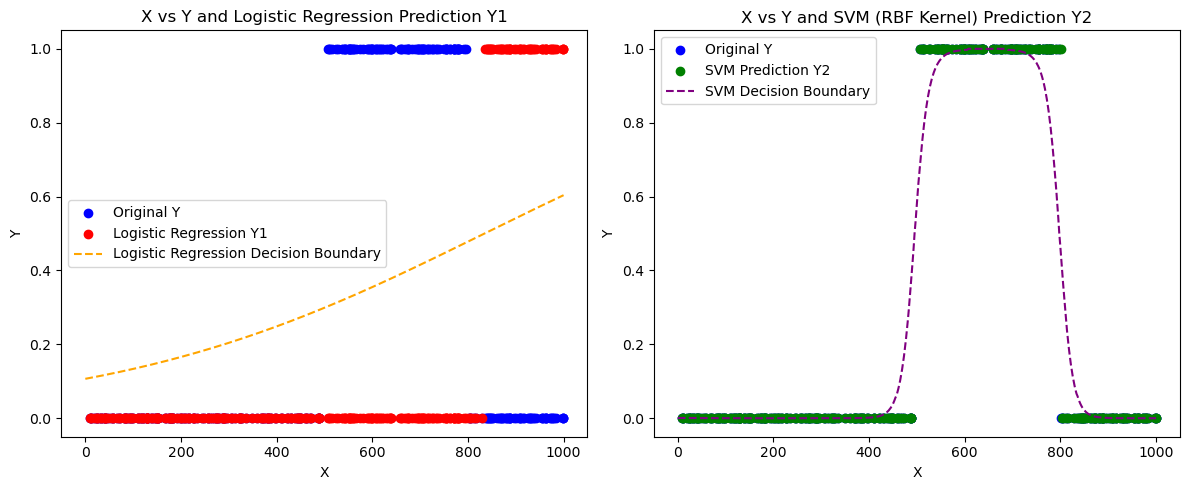

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 生成 300 個隨機變數 X(i)，範圍從 0 到 1000
np.random.seed(0)
X = np.random.randint(0, 1000, 300)

# 定義 Y(i) 的值為 1 當 500 < X(i) < 800，否則為 0
Y = np.where((X > 500) & (X < 800), 1, 0)

# 將 X 轉換為列向量形式，以適配模型的輸入要求
X = X.reshape(-1, 1)

# 分割數據集為訓練集和測試集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 使用邏輯回歸模型
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
y1_pred = logistic_model.predict(X)

# 使用 RBF 核的支持向量機 (SVM) 模型，並使用 probability=True 以獲取概率
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, Y_train)
y2_pred = svm_model.predict(X)

# 生成範圍為 0 到 1000 的 X 值，用於繪製決策邊界
X_range = np.linspace(0, 1000, 500).reshape(-1, 1)

# 邏輯回歸的決策邊界
logistic_boundary = logistic_model.predict_proba(X_range)[:, 1]

# RBF 核 SVM 的決策邊界
svm_boundary = svm_model.predict_proba(X_range)[:, 1]

# 繪製圖形
plt.figure(figsize=(12, 5))

# 圖 1: 邏輯回歸
plt.subplot(1, 2, 1)
plt.scatter(X, Y, color='blue', label='Original Y')
plt.scatter(X, y1_pred, color='red', label='Logistic Regression Y1')
plt.plot(X_range, logistic_boundary, color='orange', linestyle='--', label='Logistic Regression Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('X vs Y and Logistic Regression Prediction Y1')

# 圖 2: SVM (RBF 核)
plt.subplot(1, 2, 2)
plt.scatter(X, Y, color='blue', label='Original Y')
plt.scatter(X, y2_pred, color='green', label='SVM Prediction Y2')
plt.plot(X_range, svm_boundary, color='purple', linestyle='--', label='SVM Decision Boundary')  # SVM 的概率邊界
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('X vs Y and SVM (RBF Kernel) Prediction Y2')

plt.tight_layout()
plt.show()

1. 生成 300 個隨機變數 X，範圍從 0 到 1000。
2. 定義 Y 的值：當 500 < X < 800 時，Y = 1；否則，Y = 0。
3. 使用邏輯回歸模型對數據進行分類，並將預測結果存為 y1。
4. 使用支持向量機（SVM）模型進行分類，並將預測結果存為 y2。請注意，SVM 模型必須使用 RBF 核函數，並設置 `probability=True` 以獲取平滑的概率邊界。
5. 使用 `predict_proba` 方法生成邏輯回歸和 SVM 的決策邊界：
   - 將邏輯回歸的決策邊界繪製為虛線，並顯示在左側圖表中。
   - 將 SVM 的決策邊界繪製為虛線，並顯示在右側圖表中。
6. 將 X, Y 和預測結果繪製在圖表上，左圖展示邏輯回歸，右圖展示 SVM。
7. 請提供完整的 Python 程式碼，確保輸出圖形中能夠顯示平滑的 SVM 概率邊界曲線。

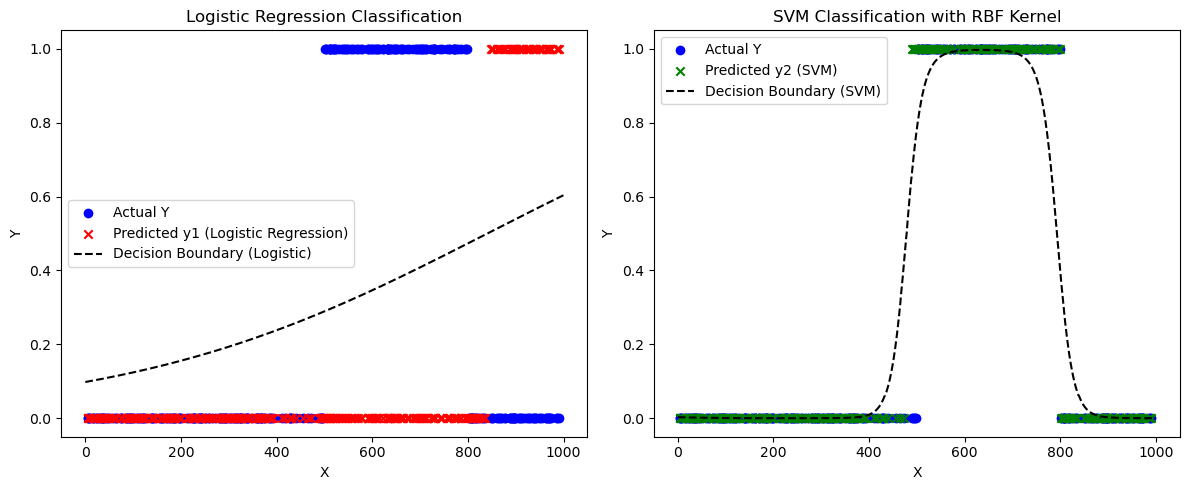

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Step 1: Generate 300 random variables X from 0 to 1000
np.random.seed(42)  # For reproducibility
X = np.random.uniform(0, 1000, 300).reshape(-1, 1)

# Step 2: Define Y based on the condition 500 < X < 800
Y = np.where((X > 500) & (X < 800), 1, 0).ravel()

# Step 3: Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X, Y)
y1 = log_reg.predict(X)

# Step 4: Support Vector Machine (SVM) with RBF kernel and probability=True
svm_clf = SVC(kernel="rbf", probability=True)
svm_clf.fit(X, Y)
y2 = svm_clf.predict(X)

# Step 5: Generate decision boundary using predict_proba
x_range = np.linspace(0, 1000, 1000).reshape(-1, 1)
log_reg_proba = log_reg.predict_proba(x_range)[:, 1]  # Probability for class 1
svm_proba = svm_clf.predict_proba(x_range)[:, 1]      # Probability for class 1

# Step 6: Plotting
plt.figure(figsize=(12, 5))

# Left plot for Logistic Regression
plt.subplot(1, 2, 1)
plt.scatter(X, Y, color="blue", label="Actual Y")
plt.scatter(X, y1, color="red", label="Predicted y1 (Logistic Regression)", marker='x')
plt.plot(x_range, log_reg_proba, color="black", linestyle="--", label="Decision Boundary (Logistic)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Logistic Regression Classification")

# Right plot for SVM
plt.subplot(1, 2, 2)
plt.scatter(X, Y, color="blue", label="Actual Y")
plt.scatter(X, y2, color="green", label="Predicted y2 (SVM)", marker='x')
plt.plot(x_range, svm_proba, color="black", linestyle="--", label="Decision Boundary (SVM)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("SVM Classification with RBF Kernel")

# Show plots
plt.tight_layout()
plt.show()